<a href="https://colab.research.google.com/github/Nidzoki/PMFSTIntroToDS/blob/main/w10/w10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

### 2025./2026.

# UVOD U PODATKOVNU ZNANOST
## **Domaća zadaća  10**
#### Zadaci za samostalan rad
*analiza i prognoziranje prosječne dnevne temperature u različitim gradovima*
</div>

# **Zadatak 1.**

Preuzmite podatke vezane za dnevne temperature [Daily Temperature of Major Cities](https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities) te učitajte podatke u `DataFrame`. Uklonite one retke gdje je prosječna temperatura jednaka -99.0.


Izvucite (u 3 različita `DataFrame`-a) podatke vezane za iduće gradove te ih pripremite u odgovarajućem formatu za Prophet:
* Zagreb
* Brisbane
* Seoul

> **Uputa**: pripremite stupac za datum te stupac za prosječnu dnevnu temperaturu.

In [54]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sudalairajkumar/daily-temperature-of-major-cities",
  "city_temperature.csv"
)

print("First 5 records:", df.head())

/tmp/ipython-input-3461808817.py:4: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'daily-temperature-of-major-cities' dataset.


/usr/local/lib/python3.12/dist-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


First 5 records:    Region  Country State     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [56]:
df.shape

(2906327, 8)

In [57]:
df = df[df['AvgTemperature'] != -99.0]

In [58]:
df.shape

(2826655, 8)

In [68]:
import pandas as pd

# Zagreb
df_zg = df[df['City'] == 'Zagreb'].copy()
df_zg['ds'] = pd.to_datetime(df_zg[['Year', 'Month', 'Day']])
df_zg['y'] = df_zg['AvgTemperature']
df_zg = df_zg[['ds', 'y']]

# Brisbane
df_bb = df[df['City'] == 'Brisbane'].copy()
df_bb['ds'] = pd.to_datetime(df_bb[['Year', 'Month', 'Day']])
df_bb['y'] = df_bb['AvgTemperature']
df_bb = df_bb[['ds', 'y']]

# Seoul
df_sl = df[df['City'] == 'Seoul'].copy()
df_sl['ds'] = pd.to_datetime(df_sl[['Year', 'Month', 'Day']])
df_sl['y'] = df_sl['AvgTemperature']
df_sl = df_sl[['ds', 'y']]

In [69]:
df_zg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8813 entries, 670101 to 678969
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      8813 non-null   datetime64[ns]
 1   y       8813 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 206.6 KB


# **Zadatak 2.**

* Koristeći Prophet, za svaki od 3 grada (koristeći 3 različita modela) prognozirajte prosječnu dnevnu temperaturu za narednih 365 dana.
* Vizualizirajte dobivene rezultate te prikažite i vizualizacije po komponentama.
* Komentirajte što uočavate.

In [70]:
import prophet

In [71]:
prophet_zg = prophet.Prophet()
prophet_bb = prophet.Prophet()
prophet_sl = prophet.Prophet()

In [72]:
prophet_zg.fit(df_zg)
prophet_bb.fit(df_bb)
prophet_sl.fit(df_sl)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [73]:
future_zg = prophet_zg.make_future_dataframe(periods=365)
future_bb = prophet_bb.make_future_dataframe(periods=365)
future_sl = prophet_sl.make_future_dataframe(periods=365)

In [74]:
forecast_zg = prophet_zg.predict(future_zg)
forecast_bb = prophet_bb.predict(future_bb)
forecast_sl = prophet_sl.predict(future_sl)

In [75]:
forecast_zg.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [76]:
forecast_zg[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9173,2021-05-08,64.783242,56.164534,73.732912
9174,2021-05-09,64.648285,56.044872,73.724018
9175,2021-05-10,64.781666,56.279412,73.173199
9176,2021-05-11,64.899446,56.481605,74.122633
9177,2021-05-12,65.242490,56.574862,73.722606


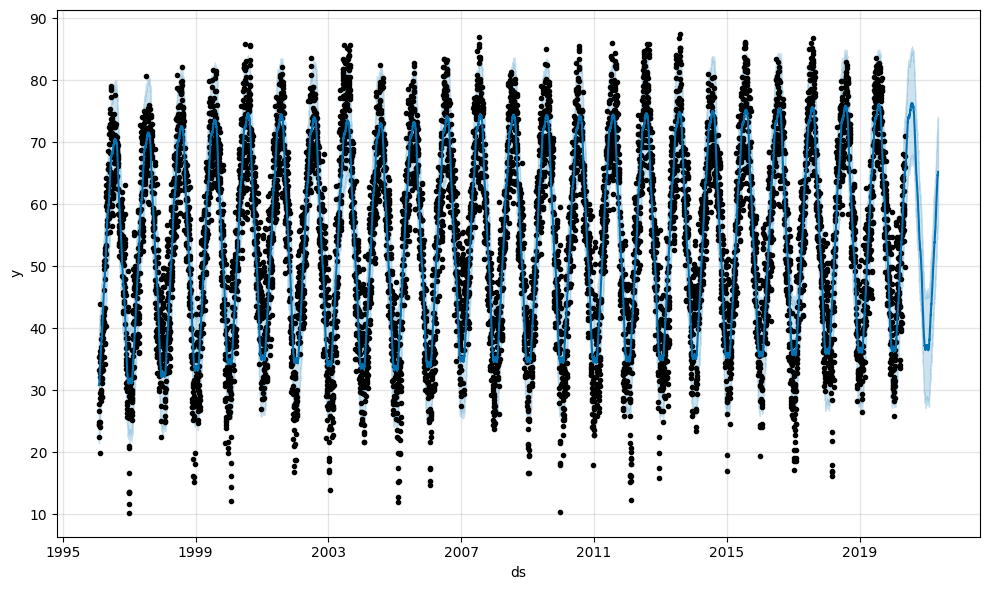

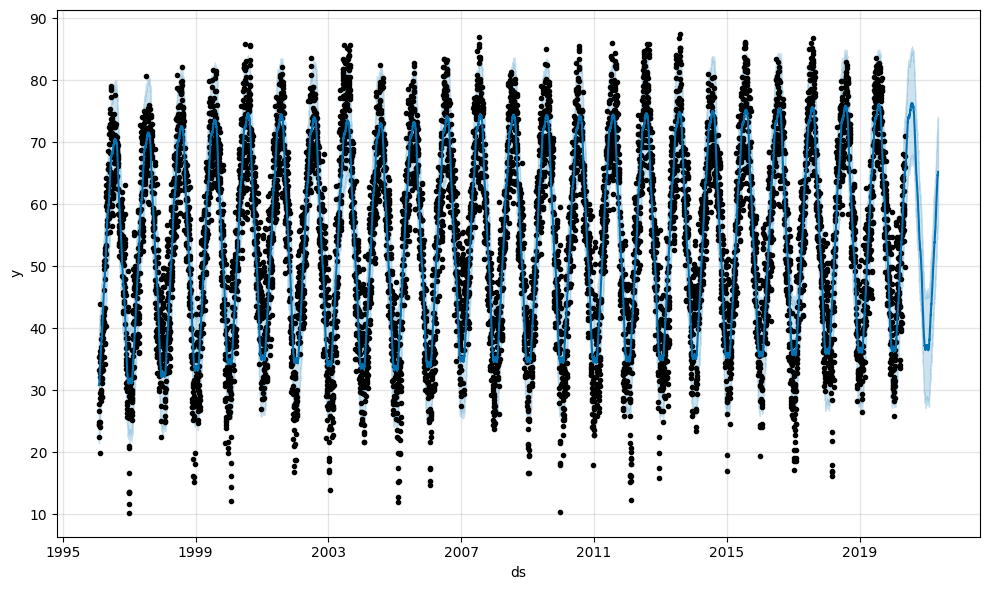

In [79]:
prophet_zg.plot(forecast_zg)

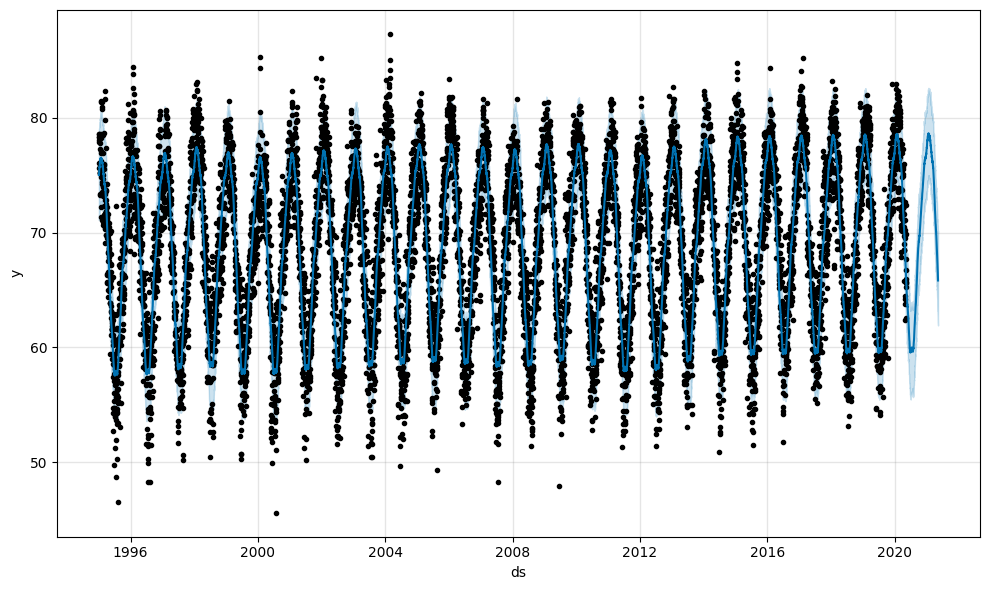

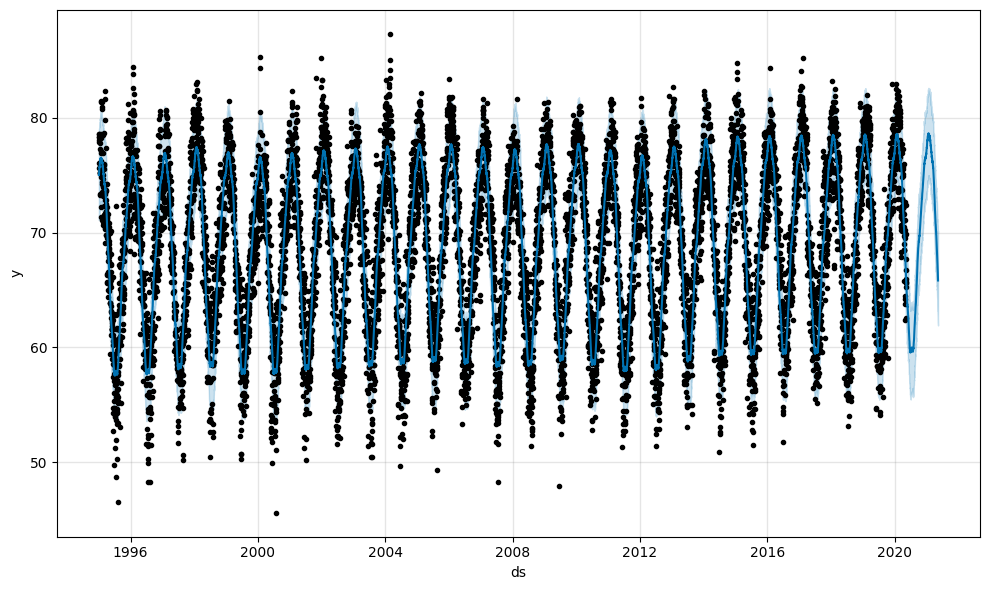

In [80]:
prophet_bb.plot(forecast_bb)

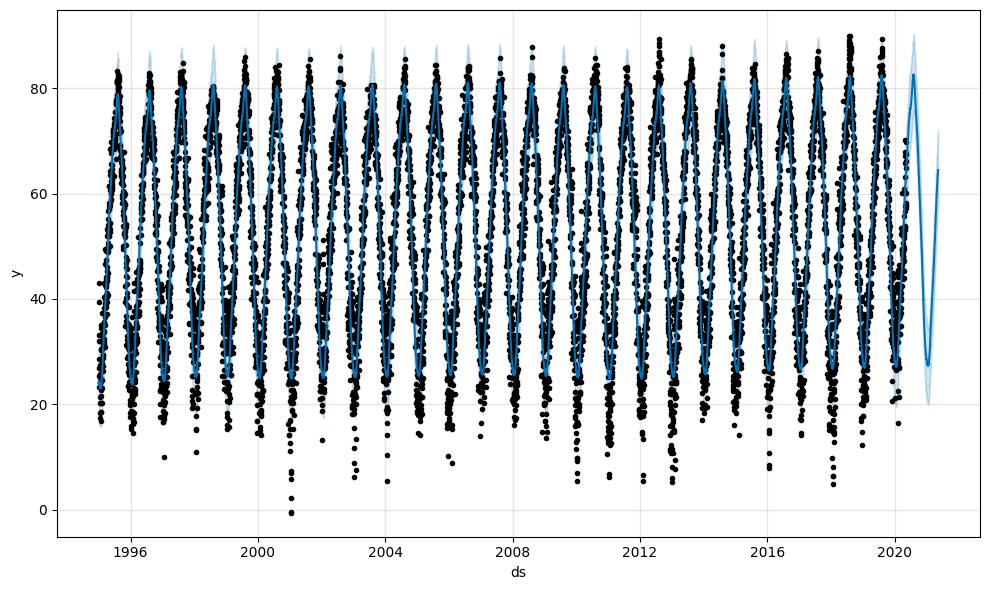

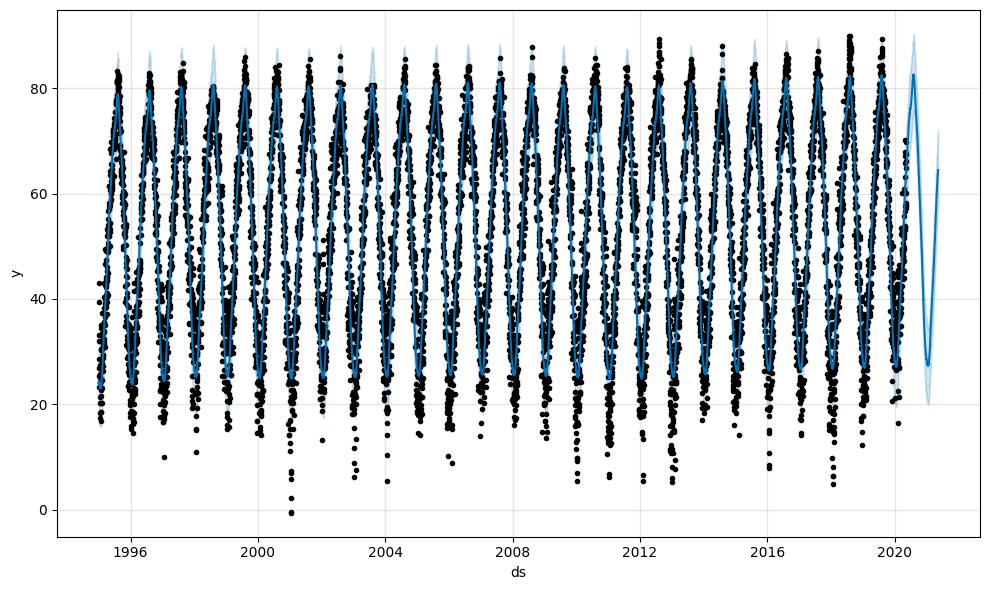

In [81]:
prophet_sl.plot(forecast_sl)

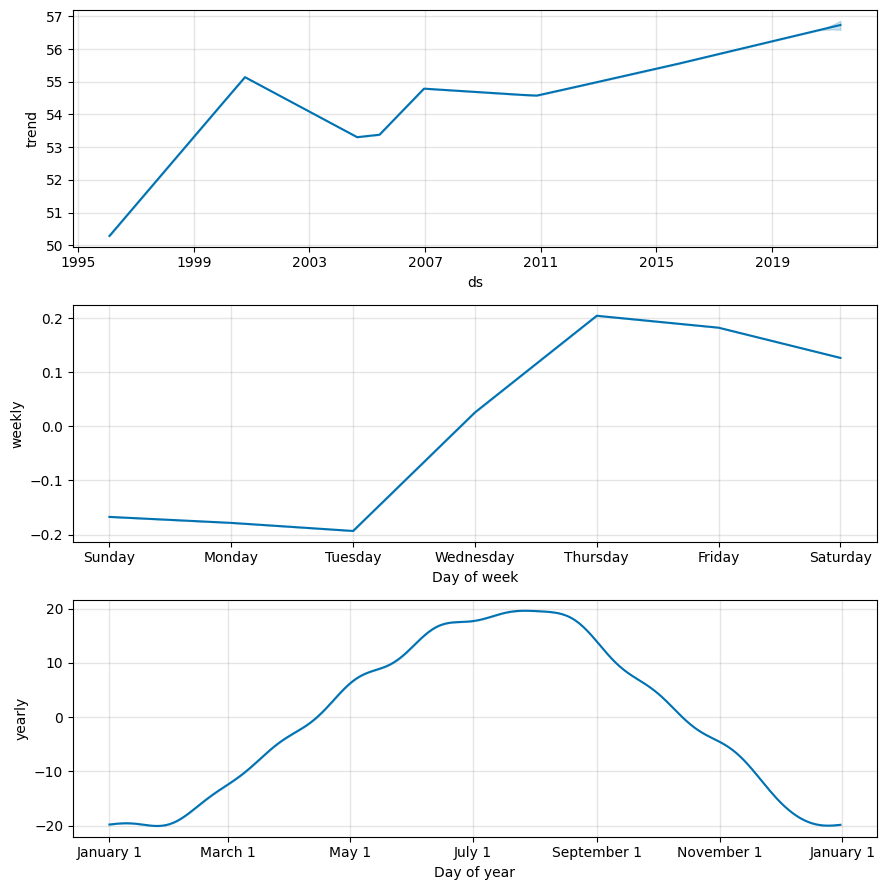

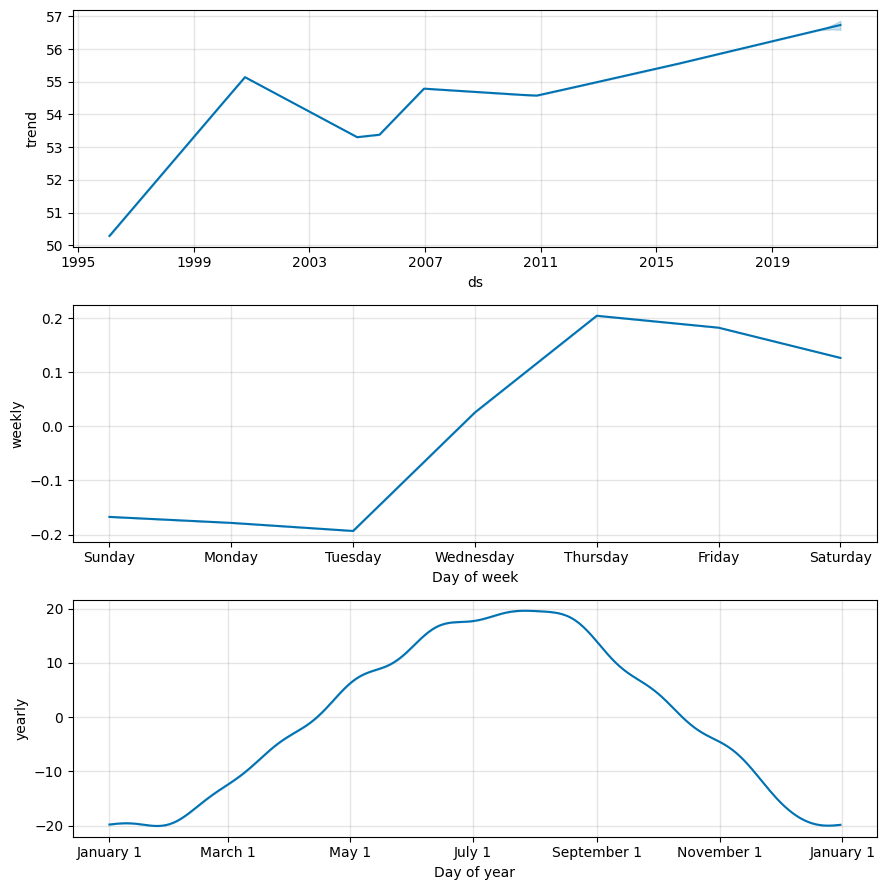

In [82]:
prophet_zg.plot_components(forecast_zg)

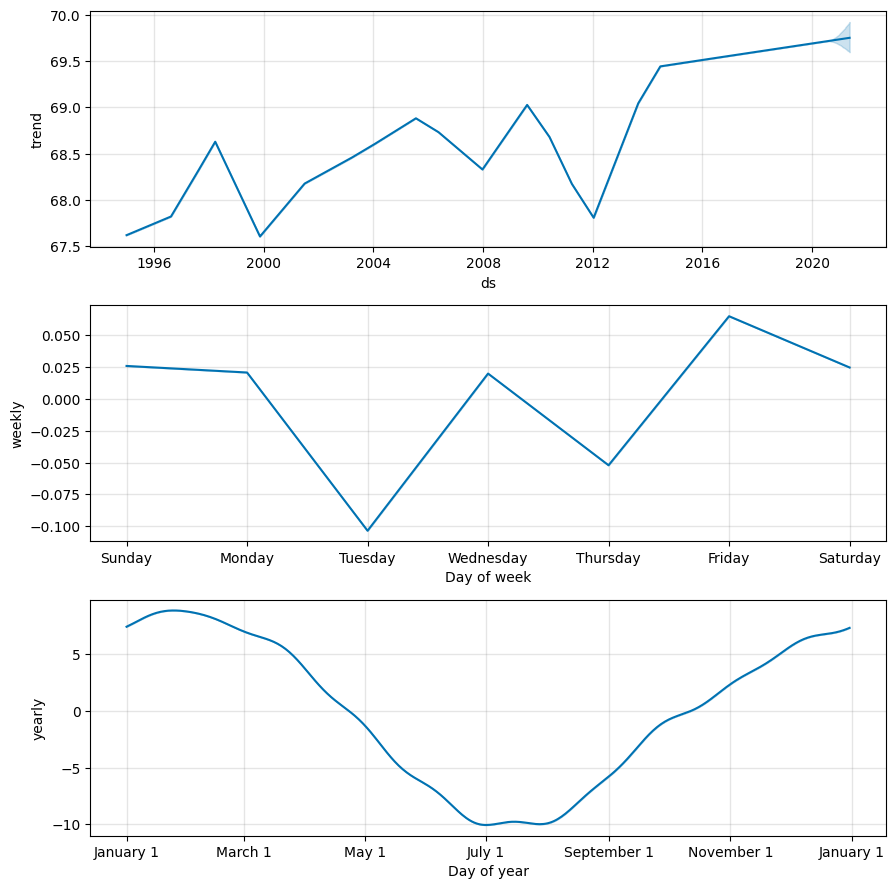

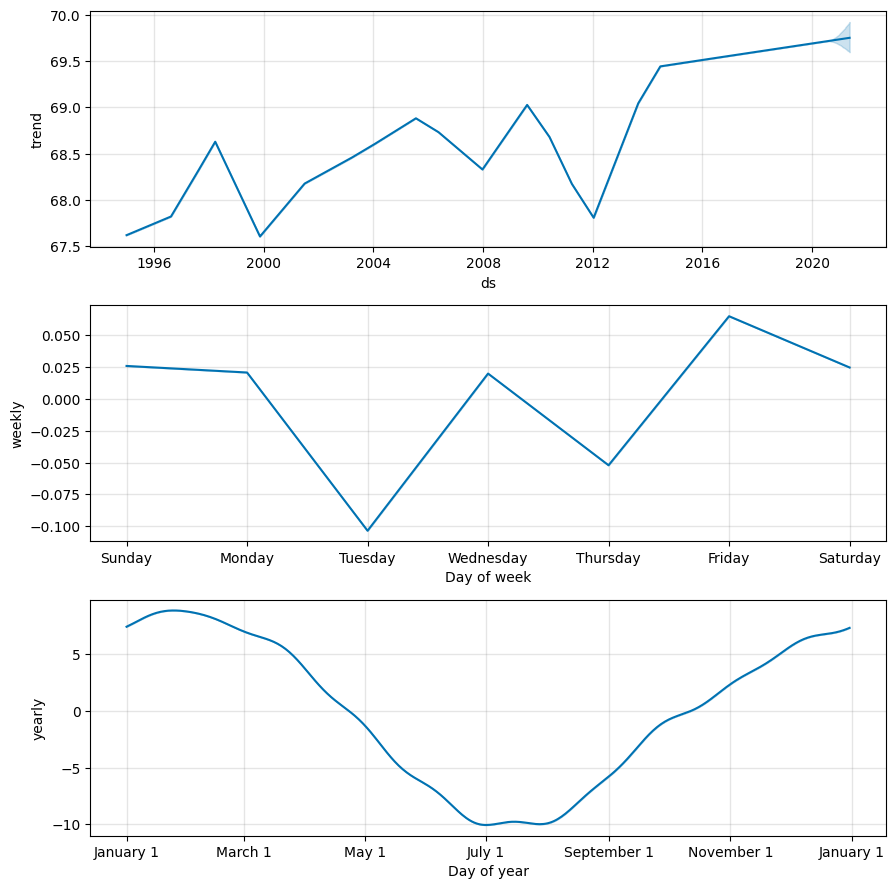

In [83]:
prophet_bb.plot_components(forecast_bb)

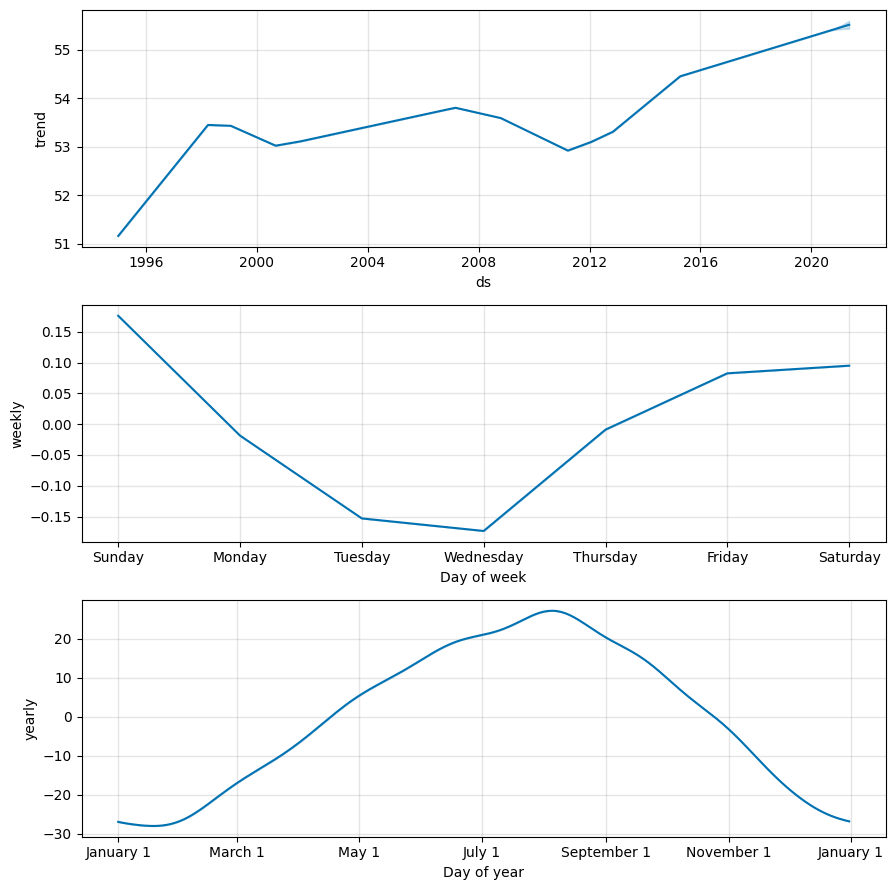

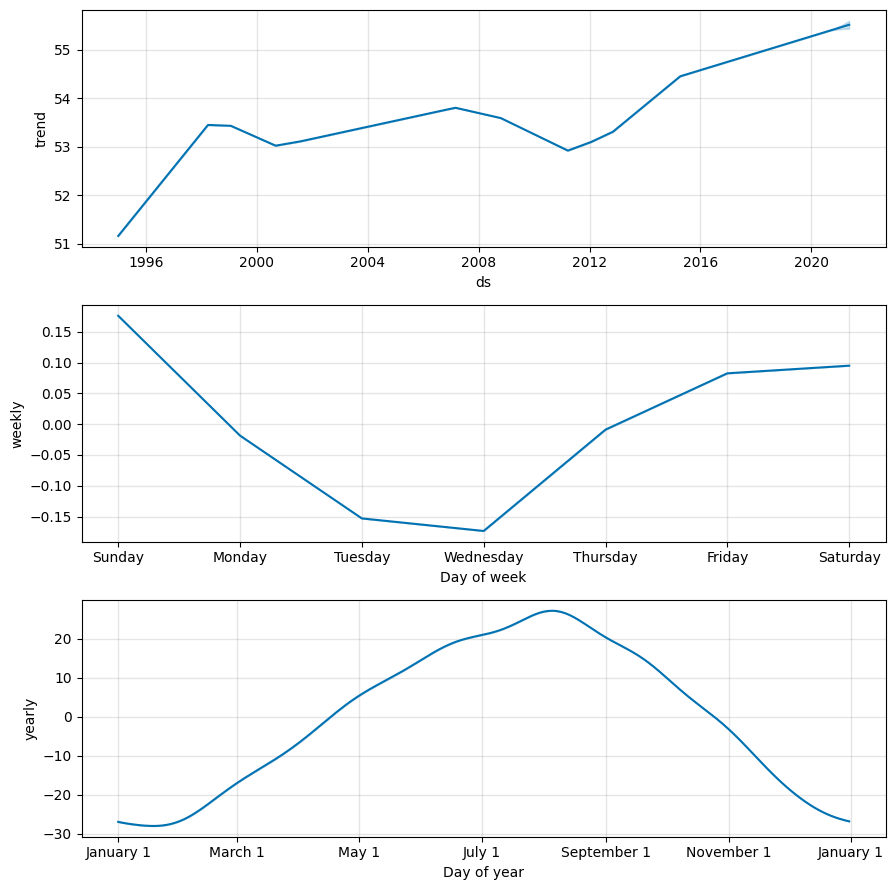

In [84]:
prophet_sl.plot_components(forecast_sl)

Temperatura je periodična na godišnjoj razini. Zagreb i Seoul imaju slično ponašanje temperature kroz godinu, dok je Brisbane u svojevrsnoj kontrafazi jer se, za razliku od Zagreba i Seoula na južnoj Zemljinoj polutci. Trend temperature je takav da u svim gradovima polako raste iz godine u godinu.

# **Zadatak 3.**

* Što mislite, postoje li događaji koji su utjecali na prosječnu dnevnu temperaturu?
> * modelirajte četiri godišnja doba
> * **tko želi znati više:** razmislite ima li smisla modelirati sva 4 godišnja doba za sva 3 grada (imaju li sva 3 grada odvojena 4 godišnja doba?)
> * **tko želi znati više:** razmislite što bi još moglo utjecati na prosječnu dnevnu temperaturu

* Modelirajte te događaje te ponovno napravite prognozu i vizualizacije (ponovno za sva 3 grada).
* Komentirajte što uočavate.
> * Pogledajte za proizvoljni datum koje su predviđene vrijednosti.

In [106]:
import pandas as pd
from prophet import Prophet

seasons_north = pd.DataFrame({
  'holiday': 'season_change',
  'ds': pd.to_datetime([
      '2015-03-21', '2015-06-21', '2015-09-23', '2015-12-21',
      '2016-03-21', '2016-06-21', '2016-09-23', '2016-12-21',
      '2017-03-21', '2017-06-21', '2017-09-23', '2017-12-21'
  ]),
  'lower_window': 0,
  'upper_window': 90,
})

def model_with_seasons(df_city, city_name, holidays_df):
    model = Prophet(holidays=holidays_df)
    model.fit(df_city)

    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)

    print(f"\n--- Prognoza za {city_name} (s modeliranim dobima) ---")
    target_date = '2020-07-01'
    val = forecast[forecast['ds'] == target_date][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    print(f"Predviđanje za {target_date}:")
    print(val)

    model.plot(forecast)
    model.plot_components(forecast)
    return model, forecast

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



--- Prognoza za Zagreb (s modeliranim dobima) ---
Predviđanje za 2020-07-01:
             ds       yhat  yhat_lower  yhat_upper
8862 2020-07-01  74.570614   65.537263   83.179983


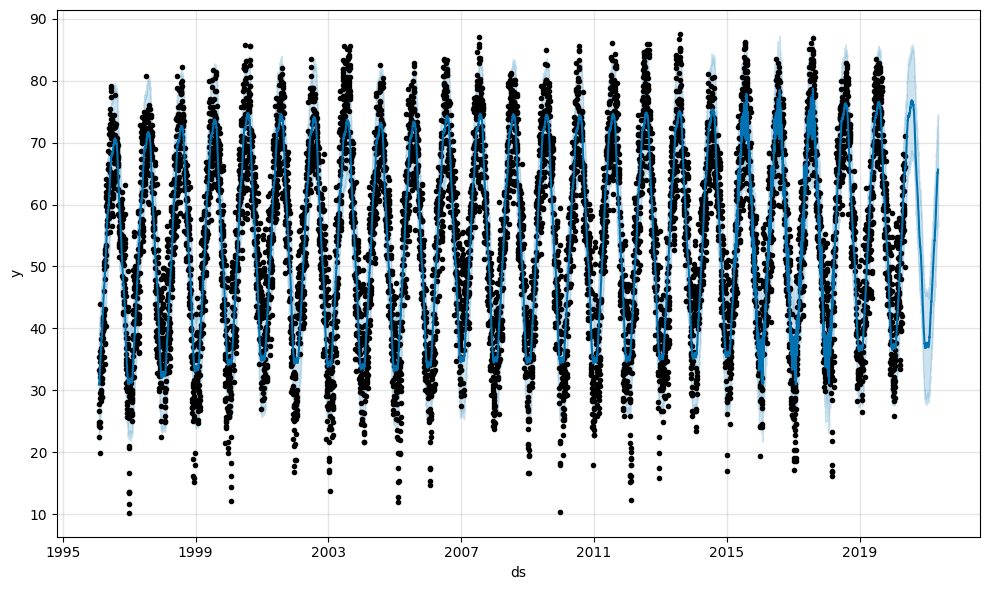

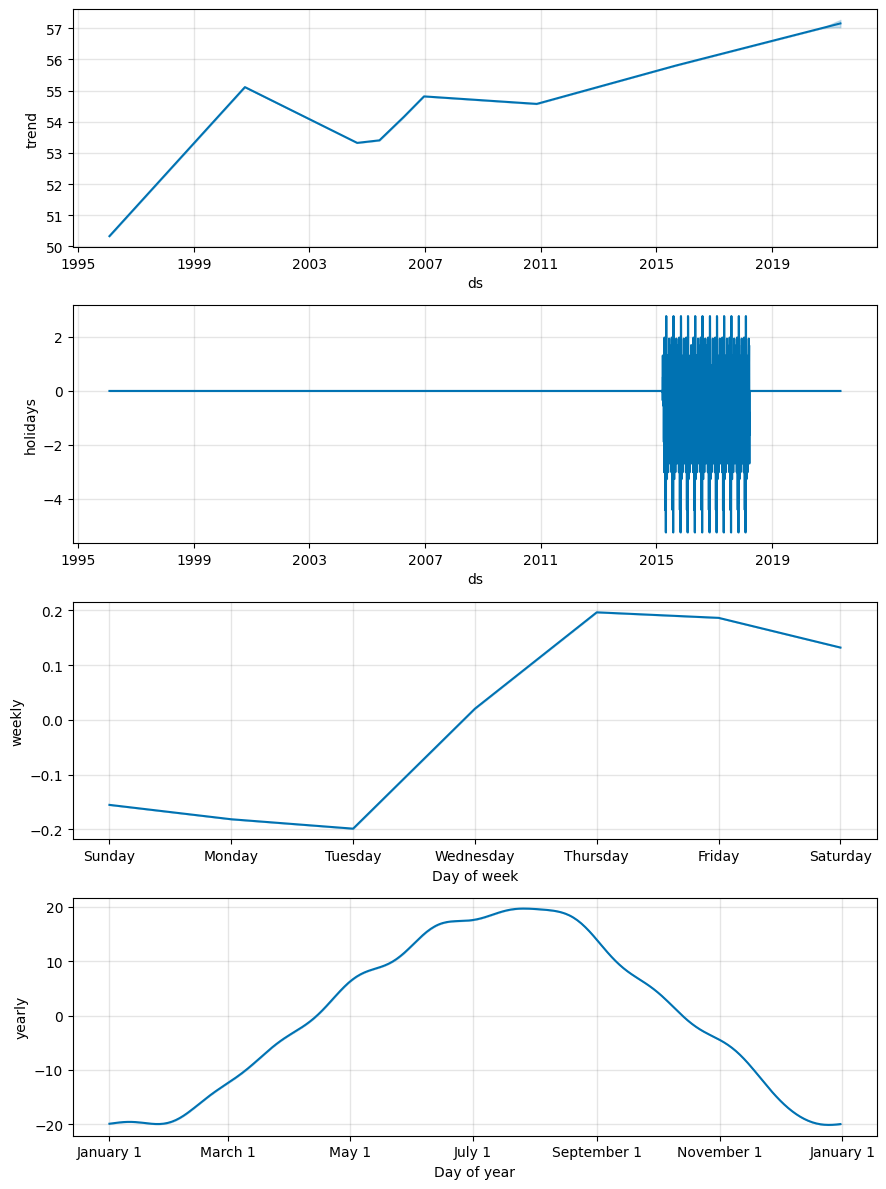

In [104]:
m_zg, f_zg = model_with_seasons(df_zg, "Zagreb", seasons_north)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



--- Prognoza za Seoul (s modeliranim dobima) ---
Predviđanje za 2020-07-01:
             ds       yhat  yhat_lower  yhat_upper
9282 2020-07-01  75.942775   68.744491   83.441643


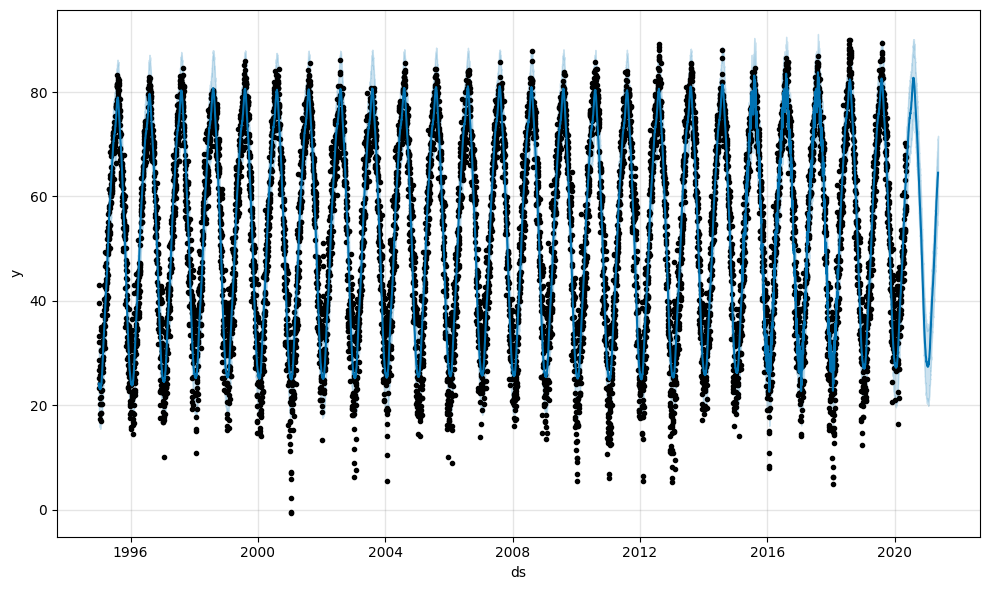

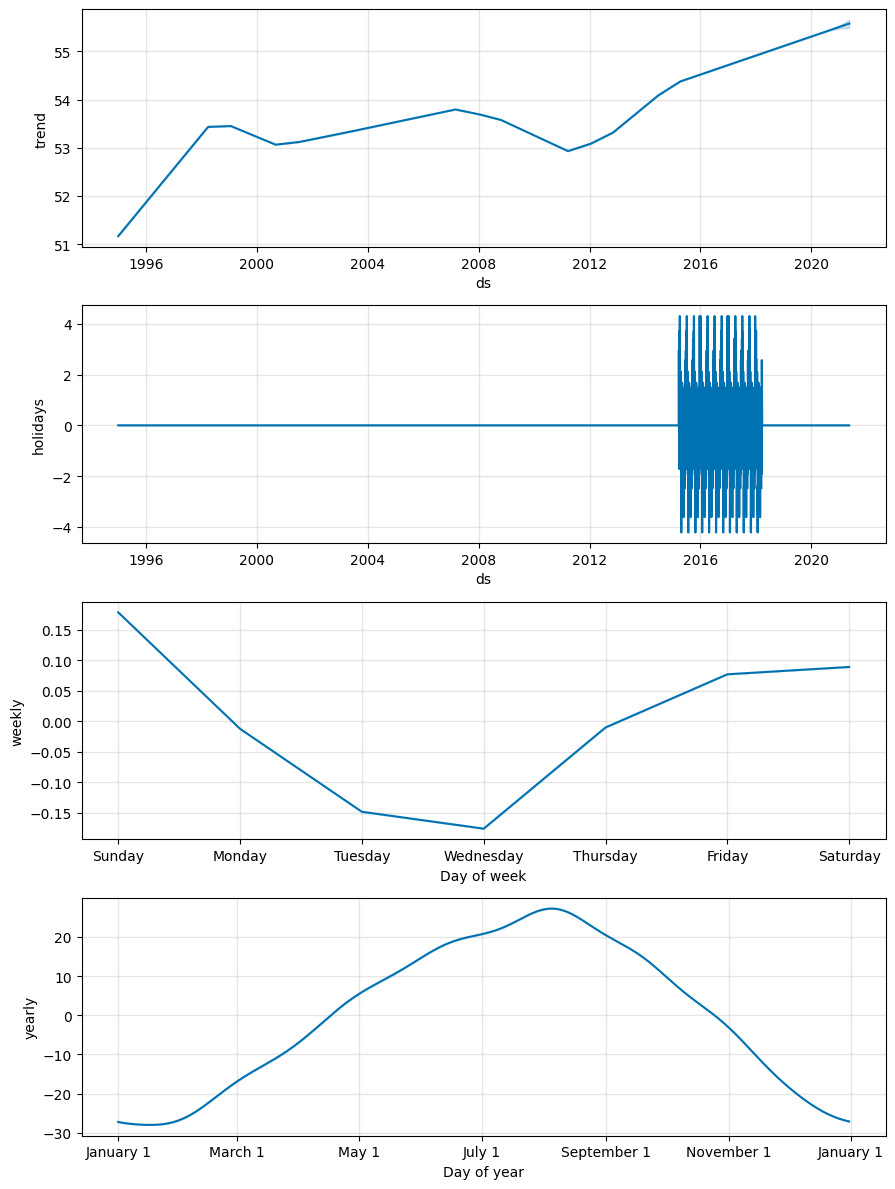

In [105]:
m_sl, f_sl = model_with_seasons(df_sl, "Seoul", seasons_north)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



--- Analiza za Brisbane (Vlažna vs. Sušna sezona) ---

Predviđanje za Božić 2020 u Brisbaneu:
             ds       yhat  yhat_lower  yhat_upper
9455 2020-12-25  76.726582   72.717437   80.338204


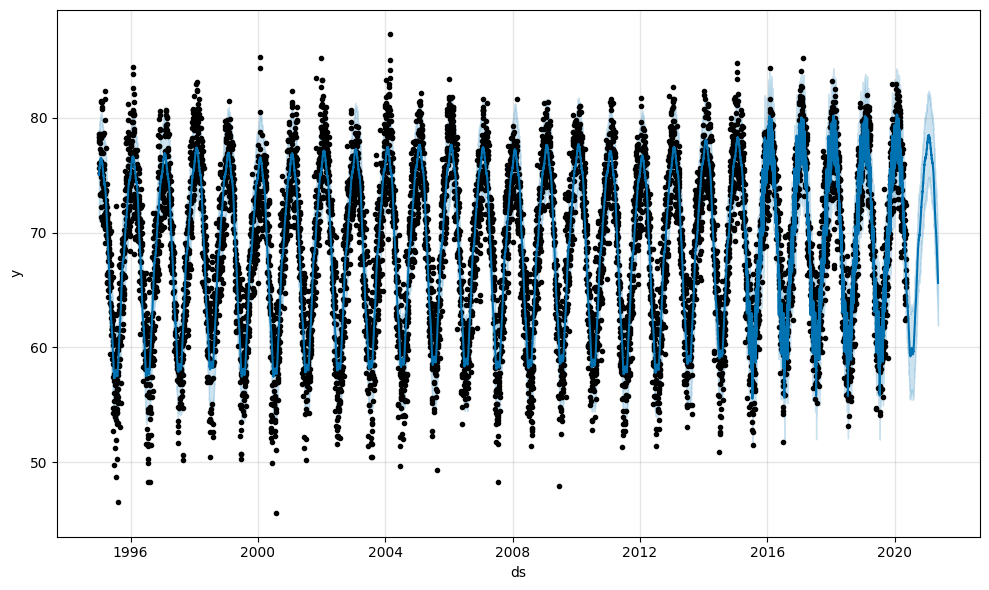

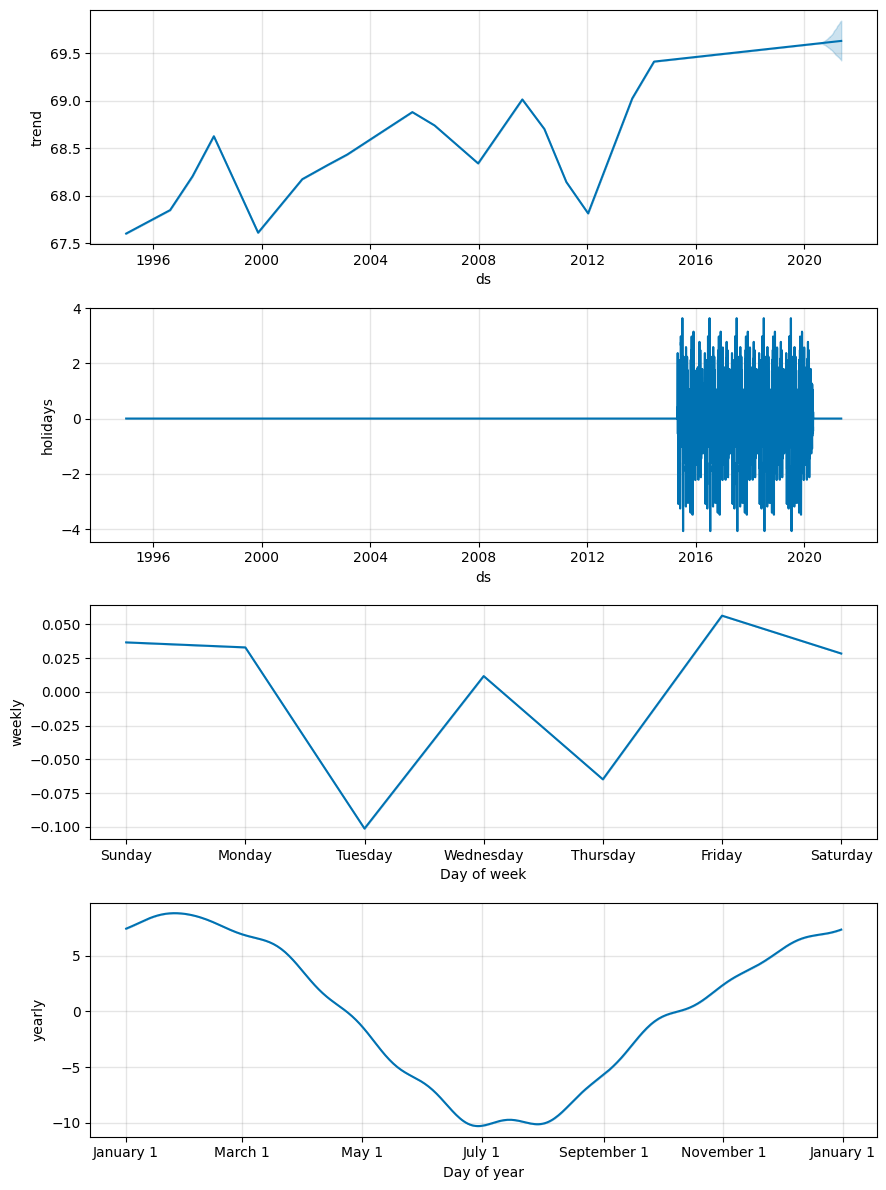

In [108]:
import pandas as pd
from prophet import Prophet

# Vlažna sezona (Wet Season): cca studeni - travanj
# Sušna sezona (Dry Season): cca svibanj - listopad

wet_season = pd.DataFrame({
  'holiday': 'wet_season',
  'ds': pd.to_datetime(['2015-11-01', '2016-11-01', '2017-11-01', '2018-11-01', '2019-11-01']),
  'lower_window': 0,
  'upper_window': 180,
})

dry_season = pd.DataFrame({
  'holiday': 'dry_season',
  'ds': pd.to_datetime(['2015-05-01', '2016-05-01', '2017-05-01', '2018-05-01', '2019-05-01']),
  'lower_window': 0,
  'upper_window': 180,
})

brisbane_holidays = pd.concat([wet_season, dry_season])

model_br = Prophet(holidays=brisbane_holidays)
model_br.fit(df_bb)

future_br = model_br.make_future_dataframe(periods=365)
forecast_br = model_br.predict(future_br)

print("\n--- Analiza za Brisbane (Vlažna vs. Sušna sezona) ---")
fig1 = model_br.plot(forecast_br)
fig2 = model_br.plot_components(forecast_br)

christmas_pred = forecast_br[forecast_br['ds'] == '2020-12-25'][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print("\nPredviđanje za Božić 2020 u Brisbaneu:")
print(christmas_pred)

# **Zadatak 4. Tko želi znati više**

Grupirajte gradove prema prosječnim dnevnim temperaturama u 10 nakupina, te vizualizirajte broj gradova po svakoj nakupini.
> Napravite sve potrebne korake!


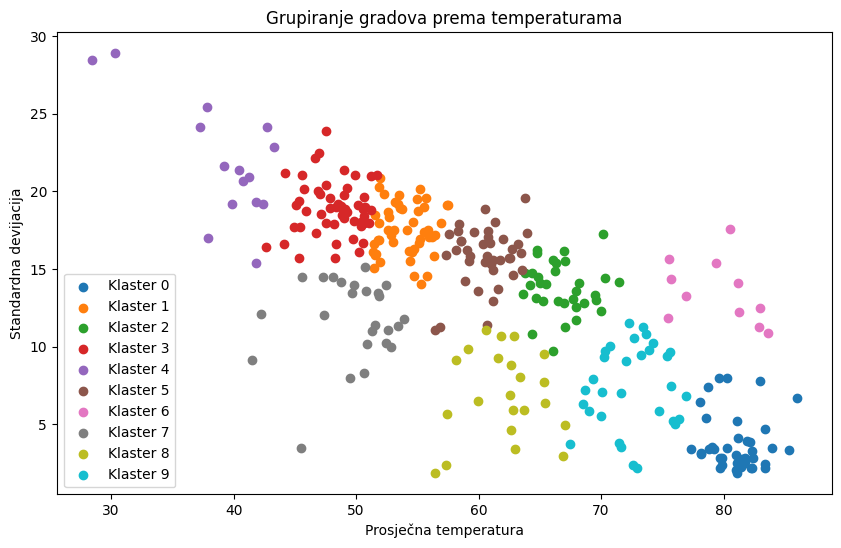

         City       mean        std  cluster
52   Brisbane  68.724128   7.192642        9
268     Seoul  53.404299  19.213324        1
319    Zagreb  54.412981  15.508147        1


In [110]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

city_stats = df.groupby('City')['AvgTemperature'].agg(['mean', 'std']).reset_index()

kmeans = KMeans(n_clusters=10, random_state=42)
city_stats['cluster'] = kmeans.fit_predict(city_stats[['mean', 'std']])

plt.figure(figsize=(10, 6))
for cluster in range(10):
    data = city_stats[city_stats['cluster'] == cluster]
    plt.scatter(data['mean'], data['std'], label=f'Klaster {cluster}')

plt.xlabel('Prosječna temperatura')
plt.ylabel('Standardna devijacija')
plt.title('Grupiranje gradova prema temperaturama')
plt.legend()
plt.show()

print(city_stats[city_stats['City'].isin(['Zagreb', 'Brisbane', 'Seoul'])])